In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
filename = 'data/train.csv'
df = pd.read_csv(filename)
size = df.shape[0]
print('Total size:', size)
df.head()

Total size: 250000


,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [3]:
def compute_missing_values(df, column_name):
    column = df[column_name].to_numpy()
    return column[np.where(column == -999.0)].shape[0]

In [4]:
for column in df.columns[2:]:
    n_nan = compute_missing_values(df, column)
    rel_nan = n_nan / size
    
    print('{column} is missing {n_nan} values, with a percentage of {rel_nan}'
              .format(column=column, n_nan=n_nan, rel_nan=rel_nan))

DER_mass_MMC is missing 38114 values, with a percentage of 0.152456
DER_mass_transverse_met_lep is missing 0 values, with a percentage of 0.0
DER_mass_vis is missing 0 values, with a percentage of 0.0
DER_pt_h is missing 0 values, with a percentage of 0.0
DER_deltaeta_jet_jet is missing 177457 values, with a percentage of 0.709828
DER_mass_jet_jet is missing 177457 values, with a percentage of 0.709828
DER_prodeta_jet_jet is missing 177457 values, with a percentage of 0.709828
DER_deltar_tau_lep is missing 0 values, with a percentage of 0.0
DER_pt_tot is missing 0 values, with a percentage of 0.0
DER_sum_pt is missing 0 values, with a percentage of 0.0
DER_pt_ratio_lep_tau is missing 0 values, with a percentage of 0.0
DER_met_phi_centrality is missing 0 values, with a percentage of 0.0
DER_lep_eta_centrality is missing 177457 values, with a percentage of 0.709828
PRI_tau_pt is missing 0 values, with a percentage of 0.0
PRI_tau_eta is missing 0 values, with a percentage of 0.0
PRI_tau_p

We can see that several features have high percentages of missing values (> 40%), then we start by training the data without those features. Based on the information we will understand, we will next decide how to treat the `DER_mass_MMC` feature, which is missing ~15% of the values.

***
### Cleaning

In [5]:
def nan_columns(df):
    
    columns = []
      
    for column in df.columns[2:]:
        n_nan = compute_missing_values(df, column)
        rel_nan = n_nan / size

        if rel_nan > 0.3:
            columns.append(column)
    
    return columns

In [6]:
columns = nan_columns(df)
df_clean = df.drop(columns, axis=1).drop("Id", axis=1)
df_clean["Prediction"] = df_clean["Prediction"].apply(lambda x: 1 if x == "s" else 0)
df_clean.head()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
0,1,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,...,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497
1,0,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,...,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226
2,0,-999.000,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,...,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251
3,0,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,...,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,0.000
4,0,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,...,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000


In [7]:
df_clean.describe()

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,0.342668,-49.023079,49.239819,81.181982,57.895962,2.373100,18.917332,158.432217,1.437609,-0.128305,...,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,73.064591
std,0.474603,406.345647,35.344886,40.828691,63.655682,0.782911,22.273494,115.706115,0.844743,1.193585,...,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,98.015662
min,0.000000,-999.000000,0.000000,6.329000,0.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,...,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,0.000000
25%,0.000000,78.100750,19.241000,59.388750,14.068750,1.810000,2.841000,77.550000,0.883000,-1.371000,...,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,0.000000
50%,0.000000,105.012000,46.524000,73.752000,38.467500,2.491500,12.315500,120.664500,1.280000,-0.356000,...,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,40.512500
75%,1.000000,130.606250,73.598000,92.259000,79.169000,2.961000,27.591000,200.478250,1.777000,1.225000,...,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,109.933750
max,1.000000,1192.026000,690.075000,1349.351000,2834.999000,5.684000,2834.999000,1852.462000,19.773000,1.414000,...,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1633.433000


***
### Correlation Matrix

In [8]:
corr = df_clean.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
Prediction,1,0.24,-0.35,-0.014,0.19,0.012,-0.015,0.15,-0.2,0.27,0.24,-0.00094,-0.0044,-0.032,0.0015,0.0041,0.022,0.0075,0.14,0.13,0.13
DER_mass_MMC,0.24,1,-0.46,0.17,0.2,0.23,0.046,0.2,-0.017,0.36,0.13,0.0026,-0.0062,0.099,0.01,-0.00074,-0.23,0.0074,0.22,0.22,0.19
DER_mass_transverse_met_lep,-0.35,-0.46,1,0.19,-0.25,0.043,0.018,-0.15,0.35,-0.42,-0.15,-0.0021,0.0011,0.31,-0.0068,0.00034,0.18,-0.016,-0.17,-0.21,-0.21
DER_mass_vis,-0.014,0.17,0.19,1,-0.063,0.58,-0.0007,0.089,0.097,-0.091,0.29,0.0021,-0.0036,0.41,0.0022,-0.002,-0.087,-0.0015,0.053,-0.027,-0.053
DER_pt_h,0.19,0.2,-0.25,-0.063,1,-0.54,0.31,0.83,0.089,0.54,0.41,0.0017,0.0052,0.36,0.0084,-0.0029,0.68,0.0086,0.78,0.62,0.81
DER_deltar_tau_lep,0.012,0.23,0.043,0.58,-0.54,1,-0.15,-0.43,0.047,-0.21,-0.2,0.0036,-0.011,-0.07,0.0007,-0.00078,-0.4,-0.0016,-0.41,-0.35,-0.45
DER_pt_tot,-0.015,0.046,0.018,-0.0007,0.31,-0.15,1,0.38,0.039,0.18,0.096,0.0036,0.0015,0.11,0.008,-0.0042,0.27,0.0025,0.45,0.36,0.4
DER_sum_pt,0.15,0.2,-0.15,0.089,0.83,-0.43,0.38,1,0.11,0.42,0.49,0.002,0.0039,0.46,0.0088,-0.0019,0.52,0.0067,0.9,0.76,0.97
DER_pt_ratio_lep_tau,-0.2,-0.017,0.35,0.097,0.089,0.047,0.039,0.11,1,-0.039,-0.47,0.00061,3.6e-06,0.7,0.0024,-0.0051,0.053,-0.0012,0.05,0.056,0.079
DER_met_phi_centrality,0.27,0.36,-0.42,-0.091,0.54,-0.21,0.18,0.42,-0.039,1,0.14,0.006,-0.0016,0.054,0.012,0.00028,0.18,0.0099,0.42,0.49,0.45


We could probably remove one feature for pairs with correlation > 0.9

***
### Distribution plots

C:\Users\dsaureli\AppData\Local\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\dsaureli\AppData\Local\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


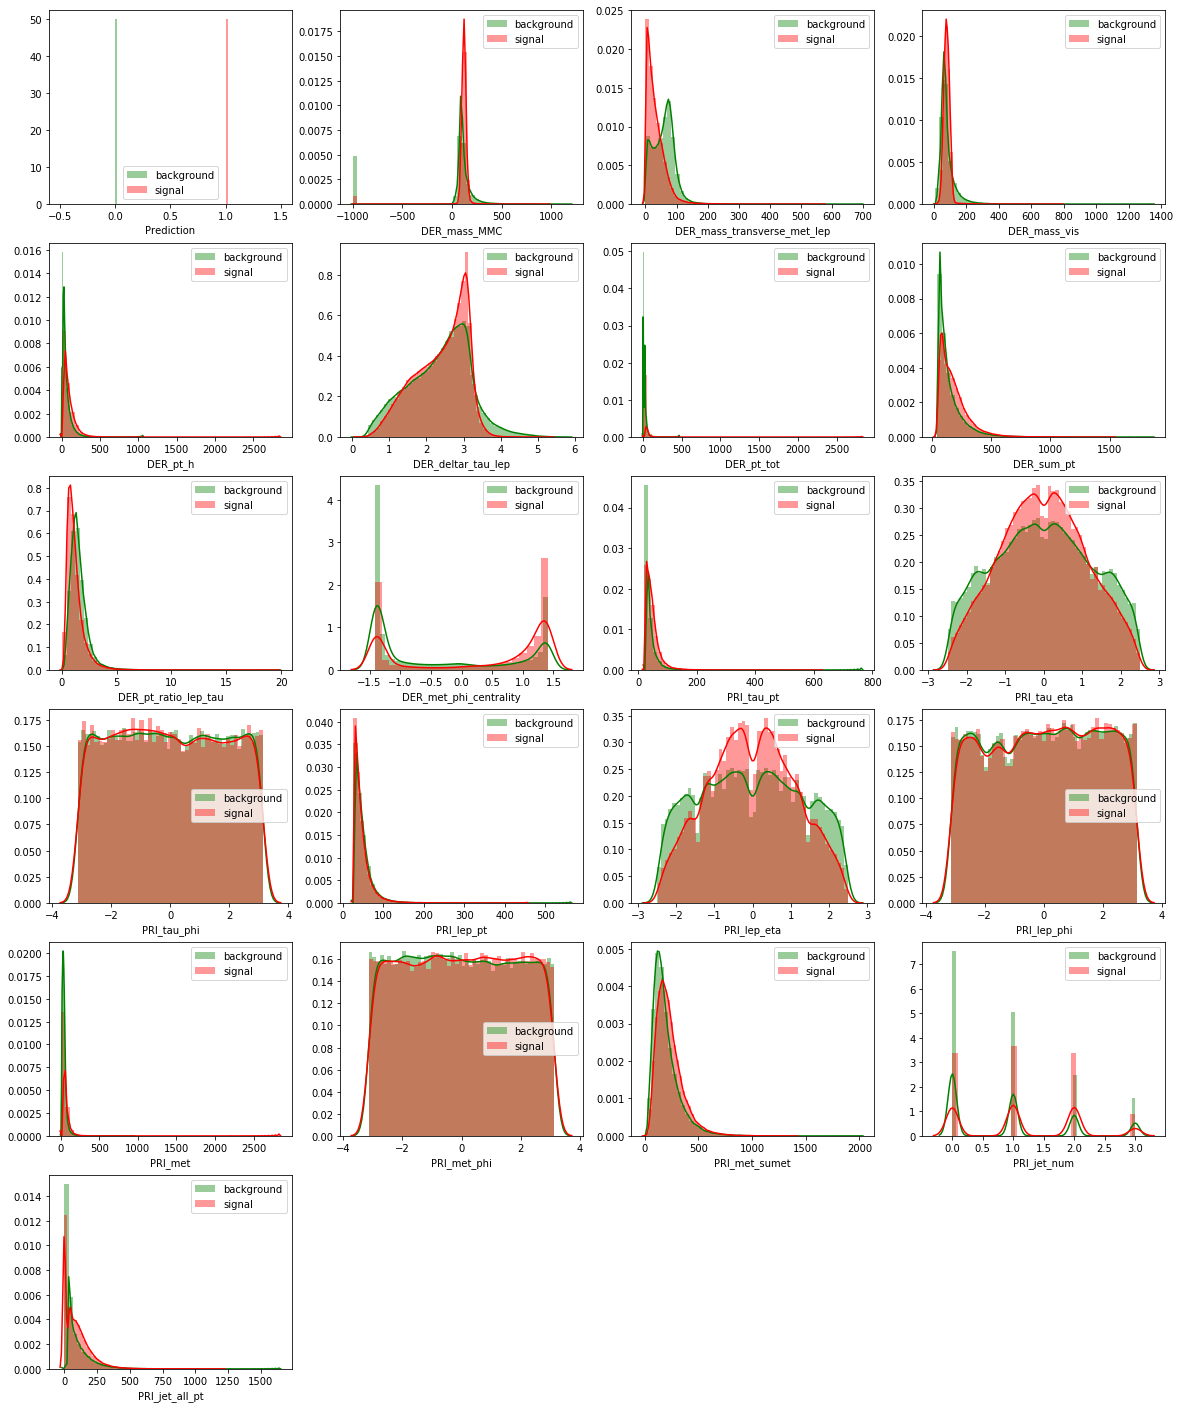

In [9]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df_clean.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df_clean[i][df_clean['Prediction']==0], color='g', label = 'background')
    sns.distplot(df_clean[i][df_clean['Prediction']==1], color='r', label = 'signal')
    plt.legend(loc='best')
plt.show()

The best features seem to be:

* DER_mass_transverse_met_lep
* DER_met_phi_centrality